მოცემულ ფაილში ვმუშაობ Waqar Ali-ს ავტორობით შედგენილ Kaggle-ზე ატვირთულ მონაცემთა ბაზაზე. მონაცემთა ბაზის დასათვალიერებლად ეწვიეთ შემდეგ ბმულს: https://www.kaggle.com/datasets/waqi786/cats-dataset რა შევცვალე: სვეტების სახელები გადავაკეთე, რათა მათთან მუშაობა შედარებით მარტივი ყოფილიყო პითონში; დავუმატე id სვეტი, რათა მონაცემებთან უკეთესი წვდომა მქონოდა (კოდის ის ნაწილი უკვე გამოყენებულია და ბაზაც, შესაბამისად, შეცვლილია, თუმცა გაუშვებელ მდგომარეობაში იმ კოდს აქ მაინც დავურთავ.

In [2]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

# # (cats_dataset ცხრილს თავიდან id სვეტი არ ჰქონდა). შემდეგი ფრაგმენტის გაშვება არაა საჭირო.
# # ორიგინალ ცხრილს primary key ახალი სვეტის სახით დავუმატე:
# # შევქმენი ახალი ცხრილი
# cursor.execute('''CREATE TABLE if not exists cats_new (
#                 id INTEGER PRIMARY KEY AUTOINCREMENT,
#                 breed TEXT,
#                 age_yrs INTEGER,
#                 weight_kgs INTEGER,
#                 color TEXT,
#                 gender TEXT)''')
#
# # ახალ ცხრილში ორიგინალი ცხრილიდან გადავიტანე ინფორმაცია (id-ს გარეშე)
# cursor.execute('''INSERT INTO cats_new (breed, age_yrs, weight_kgs, color, gender)
#                 SELECT breed, age_yrs, weight_kgs, color, gender from cats_dataset''')
#
# # ორიგინალი ცხრილი მოვიშორე და პრაქტიკულობის მიზნით ახალ ცხრილს სახელი შევუცვალე
# cursor.execute('DROP TABLE cats_dataset')
# cursor.execute('ALTER TABLE cats_new RENAME to cats_dataset'

1. 
კოდის ფრაგმენტი, რომლითაც კონკრეტული კრიტერიუმებით ბაზიდან წავიკითხავთ და დავბეჭდავთ ჩვენთვის საინტერესო ინფორმაციას:
მაგ.: მაინტერესებს ჯიშისა და ასაკის მიხედვით წაკითხვა (პირველი)
ან მაინტერესებს ფერისა და სქესის მიხედვით წაკითხვა (მეორე)

In [4]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

breed_inp = input('Enter a breed name: ')  #მაგ.: Persian, Ragdoll, Oriental, ...
min_age_inp = input('Enter a minimum age: ')
max_age_inp = input('Enter a maximum age: ')
res_count = int(input('How many results do you want to view? '))
placeholders_inp = {'b' : breed_inp, 'ming' : min_age_inp, 'maxg' : max_age_inp}
cursor.execute('''SELECT * FROM cats_dataset
                WHERE breed=:b AND age_yrs>=:ming AND age_yrs<=:maxg''', placeholders_inp)
for each in cursor.fetchmany(res_count):
    print(tuple(each))

color_inp = input('Enter a color type: ')  #მაგ.: Calico, Tabby, Black, ...
gender_inp = input('Male or Female? ')
res_count = int(input('How many results do you want to view? '))
placeholders_inp.update({'r' : color_inp, 'g' : gender_inp})
cursor.execute('''SELECT * FROM cats_dataset
                WHERE color=:r AND gender=:g''', placeholders_inp)
for each in cursor.fetchmany(res_count):
    print(tuple(each))

Enter a breed name:  Persian
Enter a minimum age:  2
Enter a maximum age:  4
How many results do you want to view?  5


(50, 'Persian', 4, 3, 'Bicolor', 'Male')
(550, 'Persian', 2, 8, 'Calico', 'Female')
(656, 'Persian', 2, 6, 'White', 'Female')
(865, 'Persian', 3, 6, 'Blue', 'Female')
(977, 'Persian', 4, 9, 'Calico', 'Female')


Enter a color type:  Calico
Male or Female?  Female
How many results do you want to view?  5


(7, 'Ragdoll', 6, 5, 'Calico', 'Female')
(25, 'Burmese', 6, 7, 'Calico', 'Female')
(91, 'Persian', 6, 8, 'Calico', 'Female')
(118, 'Chartreux', 16, 8, 'Calico', 'Female')
(140, 'Chartreux', 19, 6, 'Calico', 'Female')


ან კონკრეტული ID-ის ნომრის მქონე კატის ინფორმაციის წაკითხვა _ უკვე ფუნქციის მეშვეობით:

In [5]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

asking0 = input("Interested in a specific cat? Type 'yes' to continue: ")

def select_cat():
    cat_id = int(input('Enter the Cat\'s ID number: '))
    current_info = cursor.execute('''SELECT * FROM cats_dataset WHERE id=?''', (cat_id,))
    row = cursor.fetchone()
    print(f"Cat{cat_id}\'s info is: {tuple(row)}.")

if asking0 == 'yes':
    select_cat()

Interested in a specific cat? Type 'yes' to continue:  yes
Enter the Cat's ID number:  1000


Cat1000's info is: (1000, 'Chartreux', 11, 4, 'Sable', 'Female').


2.
კოდის ფრაგმენტი, რომლითაც მომხმარებლის მიერ input-ით შეტანილი ინფორმაციის მიხედვით
ცხრილში ვამატებთ ჩანაწერებს _ აქ უკვე ფუნქციებით თამაში დავიწყე, მუღამში შევედი და მასევე გავაგრძელე.

In [6]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()
asking1 = input("Wish to add a new cat to the database? Type 'yes' to continue: ")

def insert_cat():
    u_breed = input('breed: ')
    u_age_yrs = int(input('age (in years): '))
    u_weight_kgs = int(input('weight (in kilograms): '))
    u_color = input('color: ')
    u_gender = input('gender: ')
    usr_pet = u_breed, u_age_yrs, u_weight_kgs, u_color, u_gender
    new_cat = cursor.execute('''INSERT INTO cats_dataset (breed, age_yrs, weight_kgs, color, gender)
                                VALUES (?, ?, ?, ?, ?)''', usr_pet)
    new_cat_id = new_cat.lastrowid
    print(f'Cat has been added to the database successfully. Cat\'s ID is: {new_cat_id}.')
    return new_cat and new_cat_id

if asking1 == 'yes':
    insert_cat()

Wish to add a new cat to the database? Type 'yes' to continue:  yes
breed:  Persian
age (in years):  2
weight (in kilograms):  3
color:  Black
gender:  Male


Cat has been added to the database successfully. Cat's ID is: 1002.


3. 
კოდის ფრაგმენტი, რომლითაც მომხმარებლის მიერ input-ით შეტანილი ინფორმაციის მიხედვით ცხრილში ვანახლებთ ჩანაწერებს.
აქ შეგვყავს ერთი კონკრეტული კატის ID, ვნახულობთ ახლანდელ ინფორმაციას, ვანახლებთ, ვინახავთ, და ბოლოს ვნახულობთ განახლებულ ინფორმაციას.

In [11]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

asking2 = input("Would you like to update some info? Type 'yes' to continue: ")

def update_cat():
    cat_id = int(input('Enter the Cat\'s ID number: '))
    current_info = cursor.execute('''SELECT * FROM cats_dataset WHERE id=?''', (cat_id,))
    row = cursor.fetchone()
    print(f"Cat{cat_id}\'s current info is: {tuple(row)}. Press 'Enter' to start updating.")
    n_breed = input('breed: ')
    n_age_yrs = int(input('age (in years): '))
    n_weight_kgs = int(input('weight (in kilograms): '))
    n_color = input('color: ')
    n_gender = input('gender: ')
    new_info = n_breed, n_age_yrs, n_weight_kgs, n_color, n_gender, cat_id
    updated_info= cursor.execute('''UPDATE cats_dataset SET breed=?, age_yrs=?, weight_kgs=?, color=?, gender=?
                    WHERE id = ?''', new_info)
    conn.commit()
    print(f'Your update has affected {cursor.rowcount} row/s in the database.')
    return updated_info

if asking2 == 'yes':
    update_cat()
    check_id = int(input('Double-check the info. Enter the Cat\'s ID number: '))
    cursor.execute('''SELECT * FROM cats_dataset WHERE id=?''', (check_id,))
    row = cursor.fetchone()
    print(f"Cat{check_id}'s updated info is: {tuple(row)}.")

conn.commit()
conn.close()

Would you like to update some info? Type 'yes' to continue:  yes
Enter the Cat's ID number:  1000


Cat1000's current info is: (1000, 'Ragdoll', 2, 3, 'Black', 'Female'). Press 'Enter' to start updating.


breed:  Oriental
age (in years):  3
weight (in kilograms):  4
color:  Black
gender:  Female


Your update has affected 1 row/s in the database.


Double-check the info. Enter the Cat's ID number:  1000


Cat1000's updated info is: (1000, 'Oriental', 3, 4, 'Black', 'Female').


4.
კოდის ფრაგმენტი, რომლითაც მომხმარებლის მიერ input-ით შეტანილი ინფორმაციის მიხედვით ცხრილში ვშლით ჩანაწერებს:
აქ შეგვყავს ერთი კონკრეტული კატის ID, ვნახულობთ არსებულ ინფორმაციას, ვადასტურებთ რომ მისი წაშლა გვსურს, ვშლით/არ ვშლით (არჩევნიდან გამომდინარე).

In [1]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

asking3 = input("Would you like to delete some info? Type 'yes' to continue: ")

def delete_cat():
    cat_id = int(input('Enter the Cat\'s ID number: '))
    current_info = cursor.execute('''SELECT * FROM cats_dataset WHERE id=?''', (cat_id,))
    row = cursor.fetchone()
    confirmation = input(f"Cat{cat_id}\'s current info is: {tuple(row)}. "
                        f"\nAre you sure you want to delete this? Type 'yes' to confirm: ")
    if confirmation == 'yes':
        cursor.execute('DELETE FROM cats_dataset WHERE id=?', (cat_id,))
        conn.commit()
        print(f"You've affected {cursor.rowcount} row/s in the database.")
        return "You've removed 1 cat from the database."

if asking3 == 'yes':
    delete_cat()
#    check_id = int(input("Double-check if it's been deleted. Enter the Cat's ID number: "))
#    cursor.execute('''SELECT * FROM cats_dataset WHERE id=?''', (check_id,))
#    row = cursor.fetchone()
#    print(f"Cat{check_id}'s updated info is: {tuple(row)}.")    #აქ შედეგის შემოწმების მცდელობა მქონდა, მაგრამ Error-ს მიგდებდა და თავი მივანებე

conn.commit()
conn.close()

Would you like to delete some info? Type 'yes' to continue:  yes
Enter the Cat's ID number:  456
Cat456's current info is: (456, 'Siberian', 13, 3, 'Sable', 'Male'). 
Are you sure you want to delete this? Type 'yes' to confirm:  yes


You've affected 1 row/s in the database.


5. დიაგრამები:
#5.1. Calico და Tortoiseshell ტიპის კატების რაოდენობრივი შედარება სქესის მიხედვით

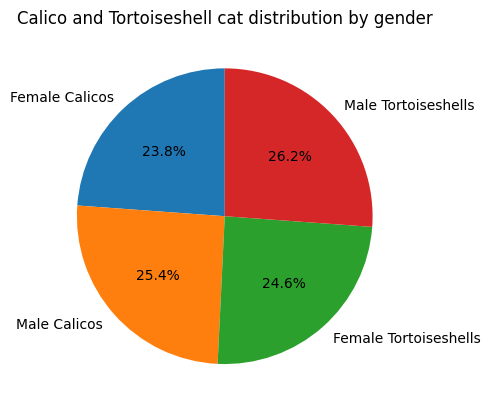

In [14]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

def count_breed_gender(color, gender):
    return cursor.execute("SELECT COUNT(*) FROM cats_dataset WHERE color=? AND gender=?", (color, gender)).fetchone()[0]

def percentage(sum, part):
    return part/sum * 100


calico_f = count_breed_gender('Calico', 'Female')
calico_m = count_breed_gender('Calico', 'Male')
tortoiseshell_f = count_breed_gender('Tortoiseshell', 'Female')
tortoiseshell_m = count_breed_gender('Tortoiseshell', 'Male')
sum_1 = calico_f + calico_m + tortoiseshell_f + tortoiseshell_m
p_calico_f = percentage(sum_1, calico_f)
p_calico_m = percentage(sum_1, calico_m)
p_tortoiseshell_f = percentage(sum_1, tortoiseshell_f)
p_tortoiseshell_m = percentage(sum_1, tortoiseshell_m)

import matplotlib.pyplot as plt

labels = 'Female Calicos', 'Male Calicos', 'Female Tortoiseshells', 'Male Tortoiseshells'
sizes = [p_calico_f, p_calico_m, p_tortoiseshell_f, p_tortoiseshell_m]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Calico and Tortoiseshell cat distribution by gender')
plt.show()

conn.close()

#5.2. ბაზაში არსებული კატების ასაკობრივი კატეგორიები

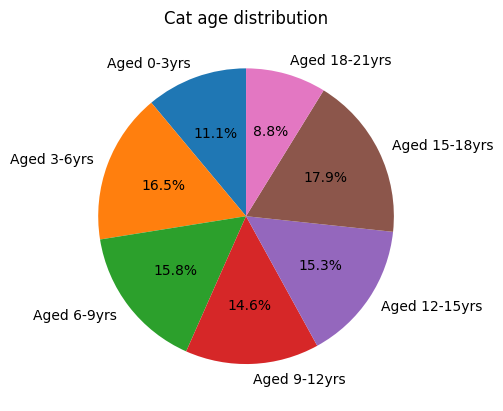

In [15]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

def select_age(min_age, max_age):
    return cursor.execute("SELECT COUNT(*) FROM cats_dataset WHERE age_yrs>=? AND age_yrs<=?", (min_age, max_age)).fetchone()[0]

def percentage(sum, part):
    return part/sum * 100

age_group1 = select_age(0, 3)
age_group2 = select_age(3, 6)
age_group3 = select_age(6, 9)
age_group4 = select_age(9, 12)
age_group5 = select_age(12, 15)
age_group6 = select_age(15, 18)
age_group7 = select_age(18, 20)
sum_2 = age_group1 + age_group2 + age_group3 + age_group4 + age_group5 + age_group6 + age_group7
p_age_group1 = percentage(sum_2, age_group1)
p_age_group2 = percentage(sum_2, age_group2)
p_age_group3 = percentage(sum_2, age_group3)
p_age_group4 = percentage(sum_2, age_group4)
p_age_group5 = percentage(sum_2, age_group5)
p_age_group6 = percentage(sum_2, age_group6)
p_age_group7 = percentage(sum_2, age_group7)

import matplotlib.pyplot as plt

labels = 'Aged 0-3yrs', 'Aged 3-6yrs', 'Aged 6-9yrs', 'Aged 9-12yrs', 'Aged 12-15yrs', 'Aged 15-18yrs', 'Aged 18-21yrs'
sizes = [p_age_group1, p_age_group2, p_age_group3, p_age_group4, p_age_group5, p_age_group6, p_age_group7]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Cat age distribution')
plt.show()

conn.close()

#5.3. ბაზაში არსებული კატების წონის კატეგორიები

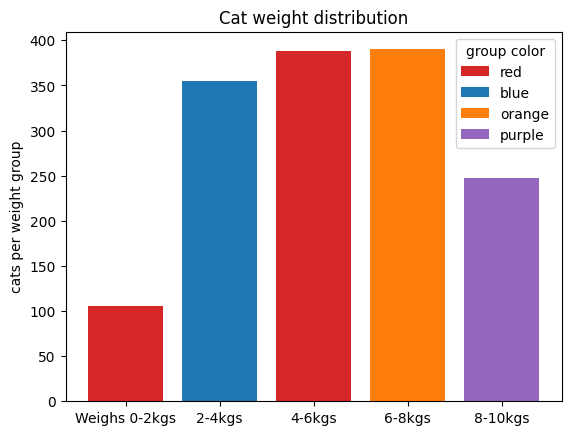

In [16]:
import sqlite3
conn = sqlite3.connect('cats.sqlite3')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

def select_weight(min_weight, max_weight):
    return cursor.execute("SELECT COUNT(*) FROM cats_dataset WHERE weight_kgs>=? AND weight_kgs<=?",
                   (min_weight, max_weight)).fetchone()[0]
weight_group1 = select_weight(0, 2)
weight_group2 = select_weight(2, 4)
weight_group3 = select_weight(4, 6)
weight_group4 = select_weight(6, 8)
weight_group5 = select_weight(8, 10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
weight_groups = ['Weighs 0-2kgs', '2-4kgs', '4-6kgs', '6-8kgs', '8-10kgs']
counts = [weight_group1, weight_group2, weight_group3, weight_group4, weight_group5]
bar_labels = ['red', 'blue', '_red', 'orange', 'purple']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple']

ax.bar(weight_groups, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('cats per weight group')
ax.set_title('Cat weight distribution')
ax.legend(title='group color')
plt.show()

conn.close()